# Aproximações Por Mínimos Quadrados

Aula dada no [PAPMEN](https://impa.br/ensino/programas-de-formacao/linha-do-tempo-dos-cursos/papmem-janeiro-de-2021/) Janeiro de 2021.

* [Vídeo da Aula](https://www.youtube.com/watch?v=eveGRiyDAlI)

* [Material](https://impa.br/wp-content/uploads/2021/01/Antonio-Branco-Aproximacao-por-Minimos-Quadrados.pdf)

## Lei de Hooke

O comprimento $C$ de uma mola em função de uma força $F$ aplicada sobre ela é dado por:

$$C = C_0 + kF$$

Onde $C_0$ é o comprimento natural da mola e $k$ é a constante de elasticidade da mesma.

A tabela a seguir mostra medidas obtidas empiricamente para uma determinada mola:

T       | Medida 1 | Medida 2 | Medida 3
--------|---------------------------
$F$ (gf)| 10       | 20       | 30
$C$ (cm)| 13.3     | 3.8      | 15.5

1. Qual o comprimento natural da mola?

2. Qual o comprimento da mola quando aplicarmos sobre ela uma força de 40 gf?

## Exerícios para desenvolvimento da teoria

1. Dados os pontos $(1,2)$, $(2,3)$ e $(4,3)$, encontrar por mínimos quadrados uma reta que melhor se ajuste a esses pontos:

**Solução** Dados os três pontos $(1,2)$, $(2,3)$ e $(4,3)$, percebemos que os mesmos não estão em uma mesma reta (o link a seguir mostra isso no GeoGebra):

[Geogebra](https://www.geogebra.org/m/yvjzmqch)

Vamos fazer a plotagem dos pontos usando também Python.

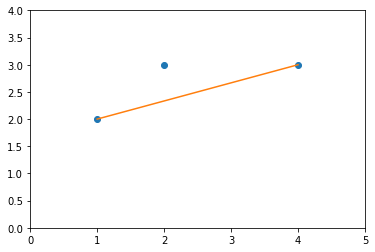

In [1]:
# Importando o pyplot: biblioteca python para plotagem de gráficos
from matplotlib import pyplot as plt

# Eixo x, Eixo y
plt.plot([1,2,4],[2,3,3],'o') # O argumento 'o' plota os pontos
plt.plot([1,4],[2,3]) # Segmento de reta de extremos (1,2) e (4,3)
plt.axis([0, 5, 0, 4]) # [xmin, xmax, ymin, ymax]
plt.show()

Queremos ajustar uma reta $y = h + mt$ aos três pontos, de maneira que:
$$
\left\{ \begin{matrix} h + m = 2 \\ h + 2m = 3 \\ h + 4m = 3 \end{matrix}  \right.
\Rightarrow
\left[ \begin{matrix} 1 & 1 \\ 1 & 2 \\ 1 & 4 \end{matrix}  \right]
\times
\left[ \begin{matrix} h \\ m \end{matrix}  \right]
=
\left[ \begin{matrix} 2 \\ 3 \\ 3 \end{matrix}  \right]
$$

O sistema anterior é impossível e sua representação matricial, é da forma
$$
Ax = b
$$

Uma reta $y = h + mt$ ajustada aos três pontos conterá um erro para cada um dos pontos:
$$
\left\{ \begin{matrix} \varepsilon_1 = 2 - (h + m) \\ \varepsilon_2 = 3 - (h + 2m) \\ \varepsilon_3 = 3 - (h + 4m) \end{matrix}  \right.
$$

Como queremos o melhor ajuste para reta, e os erros $\varepsilon$ podem assumir valores negativos e positivos, uma boa maneira de fazer esse ajuste seria minimizar:

$$\varepsilon_1^2 + \varepsilon_2^2 + \varepsilon_3^2$$

As igualdades que expressam os erros podem ser escritas da seguinte forma

$$
\left[ \begin{matrix} \varepsilon_1 \\ \varepsilon_2 \\ \varepsilon_3 \end{matrix} \right]
=
\left[ \begin{matrix} 2 \\ 3 \\ 3 \end{matrix} \right]
-
\left[ \begin{matrix} 1 & 1 \\ 1 & 2 \\ 1 & 4 \end{matrix}  \right]
\times
\left[ \begin{matrix} h \\ m \end{matrix}  \right]
$$

Que podemos representar $ \varepsilon = b - Ax$.

Assim o que queremos miniminar é o quadrado  da norma do vetor $\varepsilon$: $\| \varepsilon \|^2 = \varepsilon_1^2 + \varepsilon_2^2 + \varepsilon_3^2$.

Dessa forma nosso problema consiste em achar um vetor $\bar{x}  = \left[ \begin{matrix} \bar{h} \\ \bar{m} \end{matrix} \right]$, tal que:

$$
\| \varepsilon \|^2 = \| b - A\bar{x} \|^2
$$

seja mínimo.


A igualdade $Ax =  b$, pode ser representada da seguinte forma:
$$
Ax
=
\left[ \begin{matrix} 1 \\ 1 \\ 1 \end{matrix} \right] h
+
\left[ \begin{matrix} 1 \\ 2 \\ 4 \end{matrix} \right] m
= 
\left[ \begin{matrix} 2 \\ 3 \\ 3 \end{matrix} \right]
= b
$$

Para $h, m \in \mathbb{R}$, $Ax$ é um plano de $\mathbb{R}^3$, E como o sistema inicial é impossível, temos $b \notin Ax$.

O vetor $A\bar{x}$ que mais se aproxima $b$ é a projeção do vetor $b$ sobre o plano $Ax$. E portanto o vetor $\varepsilon = b - A\bar{x}$, que é o vetor erro de menor comprimento tem que ser perpendicular ao plano, ou seja

$$
\varepsilon  = b - A\bar{x} \perp Ax,\forall x \in \mathbb{R}^2
$$

Assim temos $(Ax) \cdot (b - A\bar{x}) = 0, \forall x \in \mathbb{R}^2$, usando a notação matricial, temos:
$$(Ax)^T(b-A\bar{x}) = 0, 0^T \in \mathbb{R}^2, \forall x \in \mathbb{R}^2$$
$$x^TA^T(b-A\bar{x}) = 0, 0^T \in \mathbb{R}^2, \forall x \in \mathbb{R}^2$$
$$x \cdot (A^T(b-A\bar{x})) = 0, \forall x \in \mathbb{R}^2$$

Como $A^T(b - A\bar{x})$ tem que ser ortogonal a todos os vetores de $\mathbb{R}^2$, temos $A^T(b - A\bar{x}) = 0$, e portanto
$$
A^TA\bar{x} = A^Tb
$$
$$
\bar{x} = (A^TA)^{-1}(A^Tb)
$$

Onde
$$
A = \left[ \begin{matrix} 1 & 1 \\ 1 & 2 \\ 1 & 4 \end{matrix}  \right]
\mbox{ e }
b =  \left[ \begin{matrix} 2 \\ 3 \\ 3 \end{matrix}  \right]
$$

In [2]:
# Vamos usar python para fazermos as operações matriciais

# Importanto a biblioteca Python para matemática
import numpy as np

In [3]:
# Criando as matrizes
A = np.array([[1.,1.],[1.,2.],[1.,4.]])
b = np.array([[2.],[3.],[3.]])

A, b

(array([[1., 1.],
        [1., 2.],
        [1., 4.]]),
 array([[2.],
        [3.],
        [3.]]))

In [4]:
M = A.T
M = M.dot(A)
M = np.linalg.inv(M)

In [5]:
N = A.T
N = N.dot(b)

In [6]:
x = M.dot(N)
x

array([[2.        ],
       [0.28571429]])

Assim a reta que melhor aproxima os pontos é a reta $y = 2 + \frac{2}{7}t$.

No [Geogebra](https://www.geogebra.org/m/c95vfeah), uma visualização da reta ajustada aos pontos.

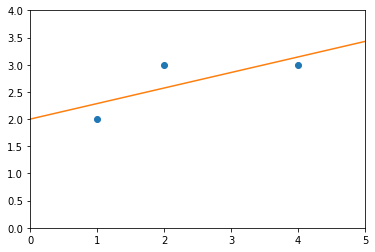

In [7]:
# Vamos plotar a reta anterior usando python

plt.plot([1,2,4],[2,3,3],'o') # Plotando os três pontos

x = np.array([0,5]) # Dois valores para plotar a reta
y = 2 + (2./7)*x # Valores em y

plt.plot(x,y) # Plotando a reta 
plt.axis([0, 5, 0, 4]) # [xmin, xmax, ymin, ymax]
plt.show()